# <center> UNITEC </center> # 

# <center> Análisis de Sistemas y Señales </center> # 
## <center> Análisis de una señal en tiempo Continuo </center> ##

## Objetivo ##
El alumno implementara el análisis de una señal física, de la cual contemplara si es una señal continua, lineal, variante o invariante en el tiempo, si contiene paridad y  si es periódica

## Materiales ##


<center>


Material   | Cantidad
------------ | --------------------------------
Computadora  |  1 por alumno
Instrumento Musical | 1
Software:    | Python
Software:    | módulo de python Numpy
Software:    | módulo de python Matplotlib
Software:    | módulo de python scipy.io.wavfile
Software:    | módulo de python waves

</center>

## Desarrollo ##

El sonido son ondas mecánicas que viajan en el aire,
los cuales mediante sensores podemos guardar en diferentes formatos de audio.
Aunque existen diferentes formas de almacenar y comprimir los datos,
la mayoría comparten información de su adquisición existen algunos que su codificación facilita mas su análisis.


### Formato WAV ###

WAV (o WAVE), 
apócope de Waveform audio file format, 
es un formato de audio digital con o sin compresión de datos desarrollado por Microsoft e IBM que se utiliza para almacenar flujos digitales de audio en el PC, 
mono y estéreo a diversas resoluciones y velocidades de muestreo. 
Las extensiones de los archivos de este tipo son .wav y .wave

### Análisis de una nota de sonido ###

Por el momento analizaremos una nota tomada de audio que corresponde con la nota Do.
La cual tiene una frecuencia de 261.63 Hz en su nota Do central o $C_{4}$.
LA nota fue grabada a una tasa de muestreo de 44100 muestras por segundo,
El cual es unn dato que nos proporciona el formato WAV. 
Por lo que el objetivo es lograr visualizar las ondas de la nota de forma clara en una gráfica.

### Analisis con Python ###

Lo primero es importar las librerías que vamos a utilizar, 
en este caso serian tres, Numpy, para crear los arreglos de los datos.
Matplotlib para graficar los datos y Scipy para poder cargar las ondas de formato WAV

In [3]:
#importamos librerias necesarias para el análisis
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as waves


Ahora ingresamos la ruta y el archivo que vamos a analizar.
Para esto vamos a usar una vase de datos libre de archivos en formato WAV, 
los cuales están en un fichero llamado Tonos, 
y el nombre del archivo es **"316898__jaz_the_man_2__do.wav"**.
Para sistemas basados en UNIX (MACOS y LINUX) la Ruta es:

**Tonos/316898__jaz_the_man_2__do.wav**

Mientras que en sistemas operativos windows es:

**Tonos\316898__jaz_the_man_2__do.wav**

siempre y cuando la carpeta Tonos este dentro del mismo fichero donde se encuentre este archivo



In [4]:
# INGRESO
Tono1 = 'Tonos/316898__jaz_the_man_2__do.wav'


Lo siguiente es obtener los datos del archivo,
los cuales son la tasa de muestreo y los datos.
La Tasa de muestreo es un valor entero.
Mientras que los datos están acomodados de acuerdo al número de canales con los que se grabaron.

In [5]:
# PROCEDIMIENTO
samplerate, data = waves.read(Tono1)
print(f"Sample Rate = {samplerate}")
print(f"number of channels = {data.shape[1]}")

Sample Rate = 44100
number of channels = 2


/var/folders/52/trst07vn7r5frc2f7s_k99bw0000gn/T/ipykernel_1155/4012994228.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = waves.read(Tono1)


De acuerdo con lo que nos muestra estos datos, tenemos un total de dos canales y una tasa de muestreo de 44100 muestras por segundo.
Ahora conn estos datos podemos saber cuanto tiempo en segundos tenemos, con el método shape de de una arreglo obtenemos el total de datos que contiene, si esto lo dividimos entre la tasa de muestro obtenemos el total de segundos.

In [6]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 0.49866213151927435s


De forma rápida podemos visualizar los datos en total en ua gráfica,
la linspace de numpy nos genera un arreglo de valores,
los cuales inician en 0 y terminan en el total de segundos de la grabación,
generando un total de pasos en segundos igual a la cantidad de datos en la señal,
Estos serán los datos que darán el tiempo en eje X del gráfico.
Los datos nos darán la amplitud en para cada lapso de tiempo,
como tenemos dos canales entonces tendremos dos señales, 
la azul indica el canal 0 y la señal roja el canal 1.



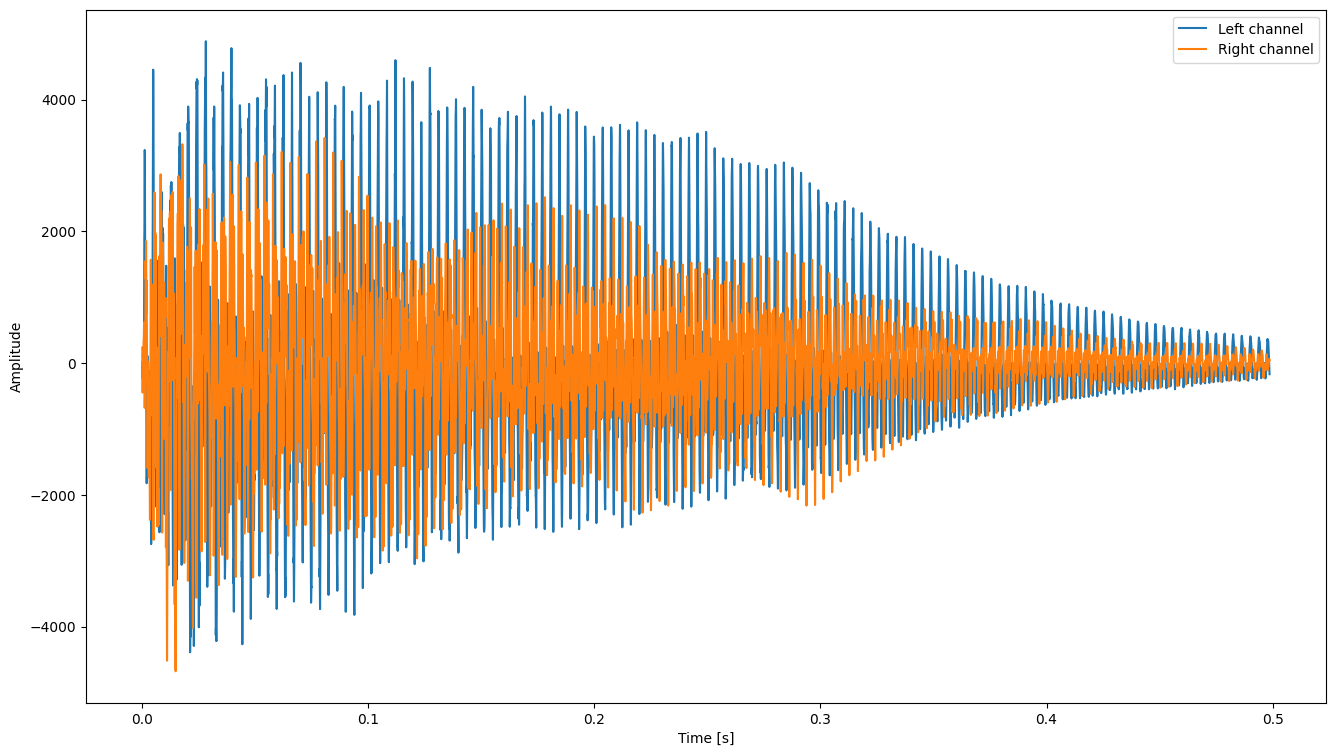

In [7]:
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(16,9))
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Como se puede observar, 
la amplitud de la onda va disminuyendo,
que si escuchan el archivo se aprecia como la intensidad de sonido disminuye.
Sin embargo,
Observar una nota sinusoidal es difícil de apreciar,
por lo mismo hay que analizar cómo visualizar los datos de una mejor manera, y para eso vamos a generar una ventana de diez ondas.
Primero si buscamos la frecuencia base de una nota Do central podemos calcular el periodo de una sola onda,
por lo tanto si la frecuencia de la nota Do es de 261.63 Hertz, entonces el periodo es igual a:

<center> 

$T = \frac{1}{261.63} = 0.003822 S$ 

</center>

Ahora con la tasa de muestreo necesitamos saber cada cuantos segundos se tardo en tomar una muestra de audio,
por lo tanto debemos de utilizar la misma ecuación solamente substituyendo la frecuencia de la nota Do por la frecuencia de muestreo es decir 44100 Hertz

<center> 

$T = \frac{1}{44100} = 0.000023 S$ 

</center>

Ahora, con la información anterior necesitamos saber cuantas muestras se necesitan obtener para visualizar una sola onda 

<center> 

$Muestras = \frac{0.003822}{0.000023} = 168.559 S$ 

</center>

Es decir si queremos observar una sola muestra debemos de tener 168 o 169 muestras de acuerdo al redondeo que se tome,
Como lo que queremos es observar son dies ondas solamente multiplicamos el número por 10 es decir 1685 muestras.
En python vamos a generar dos valores para mostrar la onda, 
lo primero es el inicio de la onda de la gráfica y lo declaramos con la variable start,
después con la bandera variable end indicamos donde termina la ventana de muestra de nuestra señal la cual el valor de inicio mas 1685,
que son las muestras necesarias para observar dies ondas completas de nuestra señal.



In [8]:
start  = 0
end = start + 1685

Ahora generamos los valores para el eje x ahora utilizando la función arange de numpy

In [9]:
time = np.arange(start/samplerate, end/samplerate, 1/samplerate)

Ahora graficaremos solamente los datos del número de muestras que necesitamos en nuestra ventana

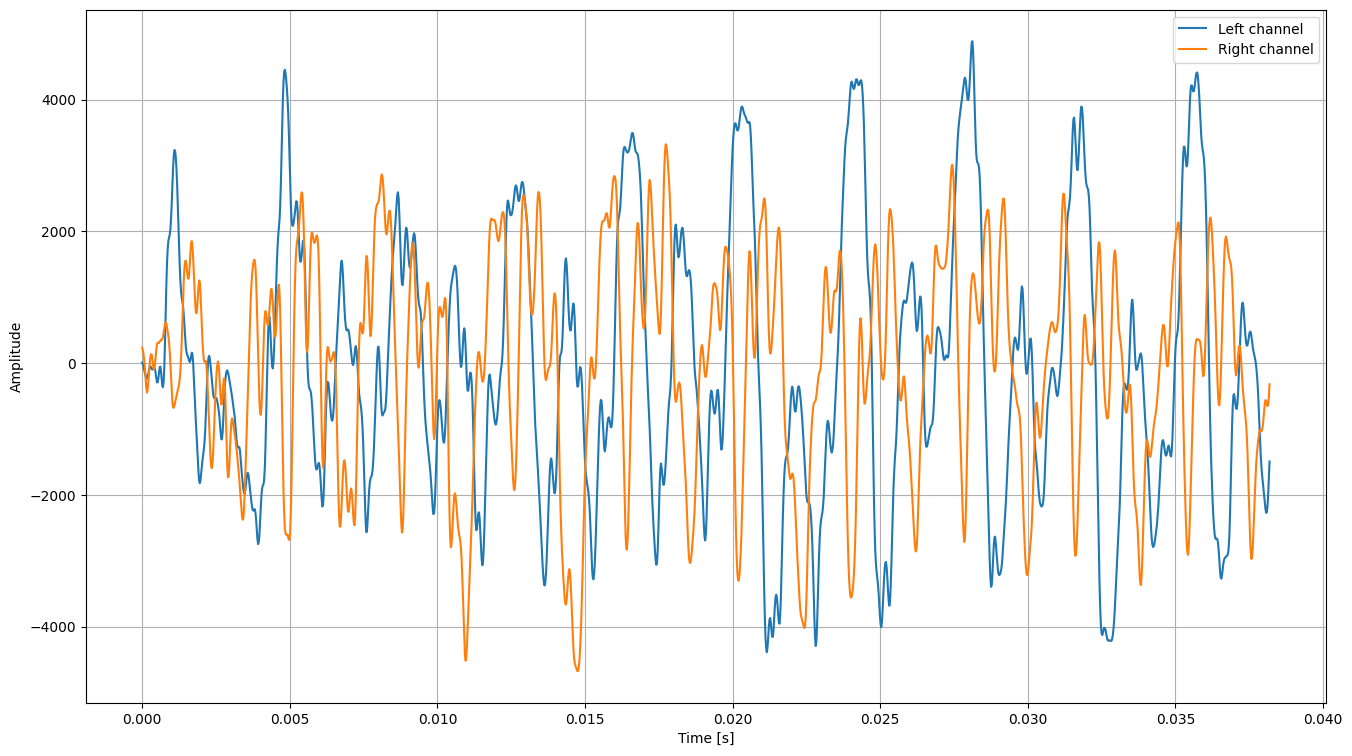

In [21]:


plt.figure(figsize=(16,9))
plt.plot(time, data[start:end, 0], label="Left channel")
plt.plot(time, data[start:end, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Al final si analizamos las crestas con mayor amplitud o amplitud similar, 
y nos daremos cuenta que son un total de Diez, 
lo cual corresponde con o que hemos calculado.